In [559]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import joypy
import random
from datetime import datetime, timedelta, timezone

from scrape.api import DATETIME_FMT_STR
from scrape.summary import run as generate_summary

In [560]:
dt_now = datetime.utcnow().replace(tzinfo=timezone.utc).strftime(DATETIME_FMT_STR)
dt_pastpoint = datetime.utcnow().replace(tzinfo=timezone.utc) - timedelta(hours=48)

print(f"Date now: {dt_now}\nStart date for analysis: {dt_pastpoint}")

Date now: 2023-03-23T21:23Z
Start date for analysis: 2023-03-21 21:23:48.847703+00:00


We will show forecasts from 48 hours before the chosen start date, and also post-hoc "forecasts" and "actual" values taken for 24 hours after that date.

We do this for several hours' worth of data (several time-points) after the chosen start date:

In [561]:
hours_of_data = 12

In [562]:
# Produce summary data
generate_summary(input_directory="data/national_fw48h", endpoint="national")
generate_summary(input_directory="data/national_pt24h", endpoint="national")

In [563]:
dffw = pd.read_csv("data/national_fw48h/summary_national.csv", index_col=0, header=[0,1])
dfpt = pd.read_csv("data/national_pt24h/summary_national.csv", index_col=0, header=[0,1])
dfpt

intensity.forecast                                         \
time_difference                -00.5  -01.0  -01.5  -02.0 -02.5 -03.0 -03.5   
2023-03-13T03:00Z                NaN    NaN    NaN    NaN   NaN   NaN   NaN   
2023-03-13T03:30Z                NaN    NaN    NaN    NaN   NaN   NaN   NaN   
2023-03-13T04:00Z                NaN    NaN    NaN    NaN   NaN   NaN   NaN   
2023-03-13T04:30Z                NaN    NaN    NaN    NaN   NaN   NaN   NaN   
2023-03-13T05:00Z                NaN    NaN    NaN    NaN   NaN   NaN   NaN   
...                              ...    ...    ...    ...   ...   ...   ...   
2023-03-22T18:00Z               97.0   97.0   97.0   97.0  97.0   NaN   NaN   
2023-03-22T18:30Z              100.0  100.0  100.0  100.0   NaN   NaN   NaN   
2023-03-22T19:00Z               94.0   94.0   94.0    NaN   NaN   NaN   NaN   
2023-03-22T19:30Z               94.0   94.0    NaN    NaN   NaN   NaN   NaN   
2023-03-22T20:00Z               91.0    NaN    NaN    NaN   NaN   NaN   NaN   

                                     ... intensity.actual                    \
time_difference   -04.0 -04.5 -05.0  ...            -19.5 -20.0 -20.5 -21.0   
2023-03-13T03:00Z   NaN   NaN   NaN  ...              NaN   NaN   NaN   NaN   
2023-03-13T03:30Z   NaN   NaN   NaN  ...              NaN   NaN   NaN   NaN   
2023-03-13T04:00Z   NaN   NaN   NaN  ...              NaN   NaN   NaN   NaN   
2023-03-13T04:30Z   NaN   NaN   NaN  ...              NaN   NaN   NaN   NaN   
2023-03-13T05:00Z   NaN   NaN   NaN  ...              NaN   NaN   NaN   NaN   
...                 ...   ...   ...  ...              ...   ...   ...   ...   
2023-03-22T18:00Z   NaN   NaN   NaN  ...              NaN   NaN   NaN   NaN   
2023-03-22T18:30Z   NaN   NaN   NaN  ...              NaN   NaN   NaN   NaN   
2023-03-22T19:00Z   NaN   NaN   NaN  ...              NaN   NaN   NaN   NaN   
2023-03-22T19:30Z   NaN   NaN   NaN  ...              NaN   NaN   NaN   NaN   
2023-03-22T20:00Z   NaN   NaN   NaN  ...              NaN   NaN   NaN   NaN   

                                                       
time_difference   -21.5 -22.0 -22.5 -23.0 -23.5 -24.0  
2023-03-13T03:00Z   NaN   NaN   NaN   NaN   NaN  64.0  
2023-03-13T03:30Z   NaN   NaN   NaN   NaN  64.0  64.0  
2023-03-13T04:00Z   NaN   NaN   NaN  56.0  56.0  56.0  
2023-03-13T04:30Z   NaN   NaN  58.0  58.0  58.0  58.0  
2023-03-13T05:00Z   NaN  62.0  62.0  62.0  62.0  62.0  
...                 ...   ...   ...   ...   ...   ...  
2023-03-22T18:00Z   NaN   NaN   NaN   NaN   NaN   NaN  
2023-03-22T18:30Z   NaN   NaN   NaN   NaN   NaN   NaN  
2023-03-22T19:00Z   NaN   NaN   NaN   NaN   NaN   NaN  
2023-03-22T19:30Z   NaN   NaN   NaN   NaN   NaN   NaN  
2023-03-22T20:00Z   NaN   NaN   NaN   NaN   NaN   NaN  

[446 rows x 96 columns]

In [566]:
merged_df = pd.merge(dffw, dfpt, left_index=True, right_index=True, how="outer")
merged_df.index = pd.to_datetime(merged_df.index)

# Set columns to float and sort

# whole dataframe
# dfif.columns = dfif.columns.astype(float)
# dfif = dfif.reindex(sorted(dfif.columns), axis=1)

# one subset of columns in a multi-index
merged_df.columns = merged_df.columns.set_levels(merged_df.columns.levels[1].astype(float), level=1)
merged_df = merged_df.reindex(sorted(merged_df.columns, reverse=True), axis=1)
merged_df

intensity.forecast                                \
time_difference                         47.5  47.0  46.5  46.0  45.5  45.0   
2023-03-13 03:00:00+00:00                NaN   NaN   NaN   NaN   NaN   NaN   
2023-03-13 03:30:00+00:00                NaN   NaN   NaN   NaN   NaN   NaN   
2023-03-13 04:00:00+00:00                NaN   NaN   NaN   NaN   NaN   NaN   
2023-03-13 04:30:00+00:00                NaN   NaN   NaN   NaN   NaN   NaN   
2023-03-13 05:00:00+00:00                NaN   NaN   NaN   NaN   NaN   NaN   
...                                      ...   ...   ...   ...   ...   ...   
2023-03-24 18:00:00+00:00               71.0  71.0  71.0  71.0  71.0   NaN   
2023-03-24 18:30:00+00:00               72.0  72.0  72.0  72.0   NaN   NaN   
2023-03-24 19:00:00+00:00               72.0  71.0  71.0   NaN   NaN   NaN   
2023-03-24 19:30:00+00:00               70.0  70.0   NaN   NaN   NaN   NaN   
2023-03-24 20:00:00+00:00               71.0   NaN   NaN   NaN   NaN   NaN   

                                                   ... intensity.actual        \
time_difference            44.5  44.0  43.5  43.0  ...            -19.5 -20.0   
2023-03-13 03:00:00+00:00   NaN   NaN   NaN   NaN  ...              NaN   NaN   
2023-03-13 03:30:00+00:00   NaN   NaN   NaN   NaN  ...              NaN   NaN   
2023-03-13 04:00:00+00:00   NaN   NaN   NaN   NaN  ...              NaN   NaN   
2023-03-13 04:30:00+00:00   NaN   NaN   NaN   NaN  ...              NaN   NaN   
2023-03-13 05:00:00+00:00   NaN   NaN   NaN   NaN  ...              NaN   NaN   
...                         ...   ...   ...   ...  ...              ...   ...   
2023-03-24 18:00:00+00:00   NaN   NaN   NaN   NaN  ...              NaN   NaN   
2023-03-24 18:30:00+00:00   NaN   NaN   NaN   NaN  ...              NaN   NaN   
2023-03-24 19:00:00+00:00   NaN   NaN   NaN   NaN  ...              NaN   NaN   
2023-03-24 19:30:00+00:00   NaN   NaN   NaN   NaN  ...              NaN   NaN   
2023-03-24 20:00:00+00:00   NaN   NaN   NaN   NaN  ...              NaN   NaN   

                                                                           
time_difference           -20.5 -21.0 -21.5 -22.0 -22.5 -23.0 -23.5 -24.0  
2023-03-13 03:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN  64.0  
2023-03-13 03:30:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN  64.0  64.0  
2023-03-13 04:00:00+00:00   NaN   NaN   NaN   NaN   NaN  56.0  56.0  56.0  
2023-03-13 04:30:00+00:00   NaN   NaN   NaN   NaN  58.0  58.0  58.0  58.0  
2023-03-13 05:00:00+00:00   NaN   NaN   NaN  62.0  62.0  62.0  62.0  62.0  
...                         ...   ...   ...   ...   ...   ...   ...   ...  
2023-03-24 18:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2023-03-24 18:30:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2023-03-24 19:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2023-03-24 19:30:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2023-03-24 20:00:00+00:00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[563 rows x 288 columns]

<Axes: xlabel='time_difference'>

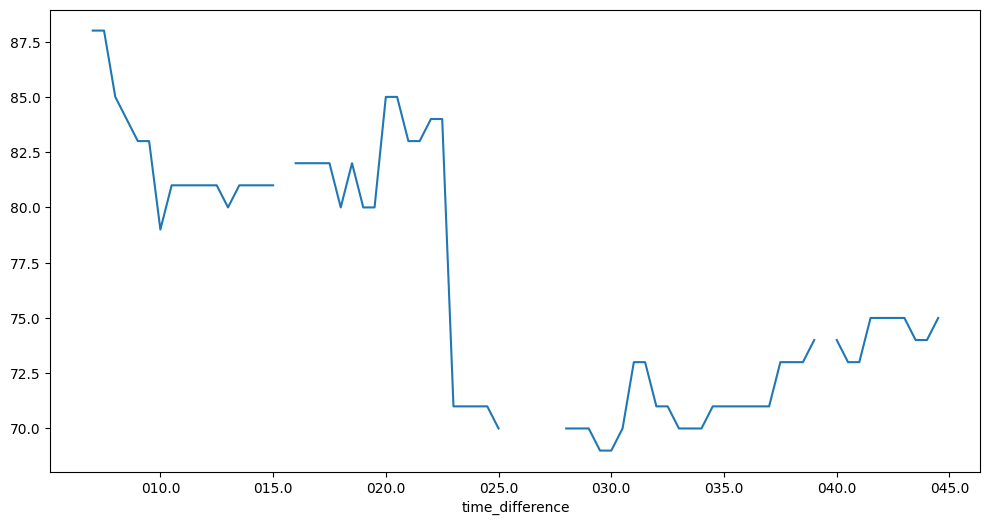

In [568]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

plt.figure()
dffw["intensity.forecast"].loc["2023-03-23T03:30Z"].plot()

In [574]:
# We will get data for half this many hours as time-points are half-hourly.
nrows = hours_of_data * 2
dates = [d for d in merged_df.index if d >= dt_pastpoint][:nrows]

# Alternatively plot some random dates
# dates = random.choices(merged_df.index, k=nrows)

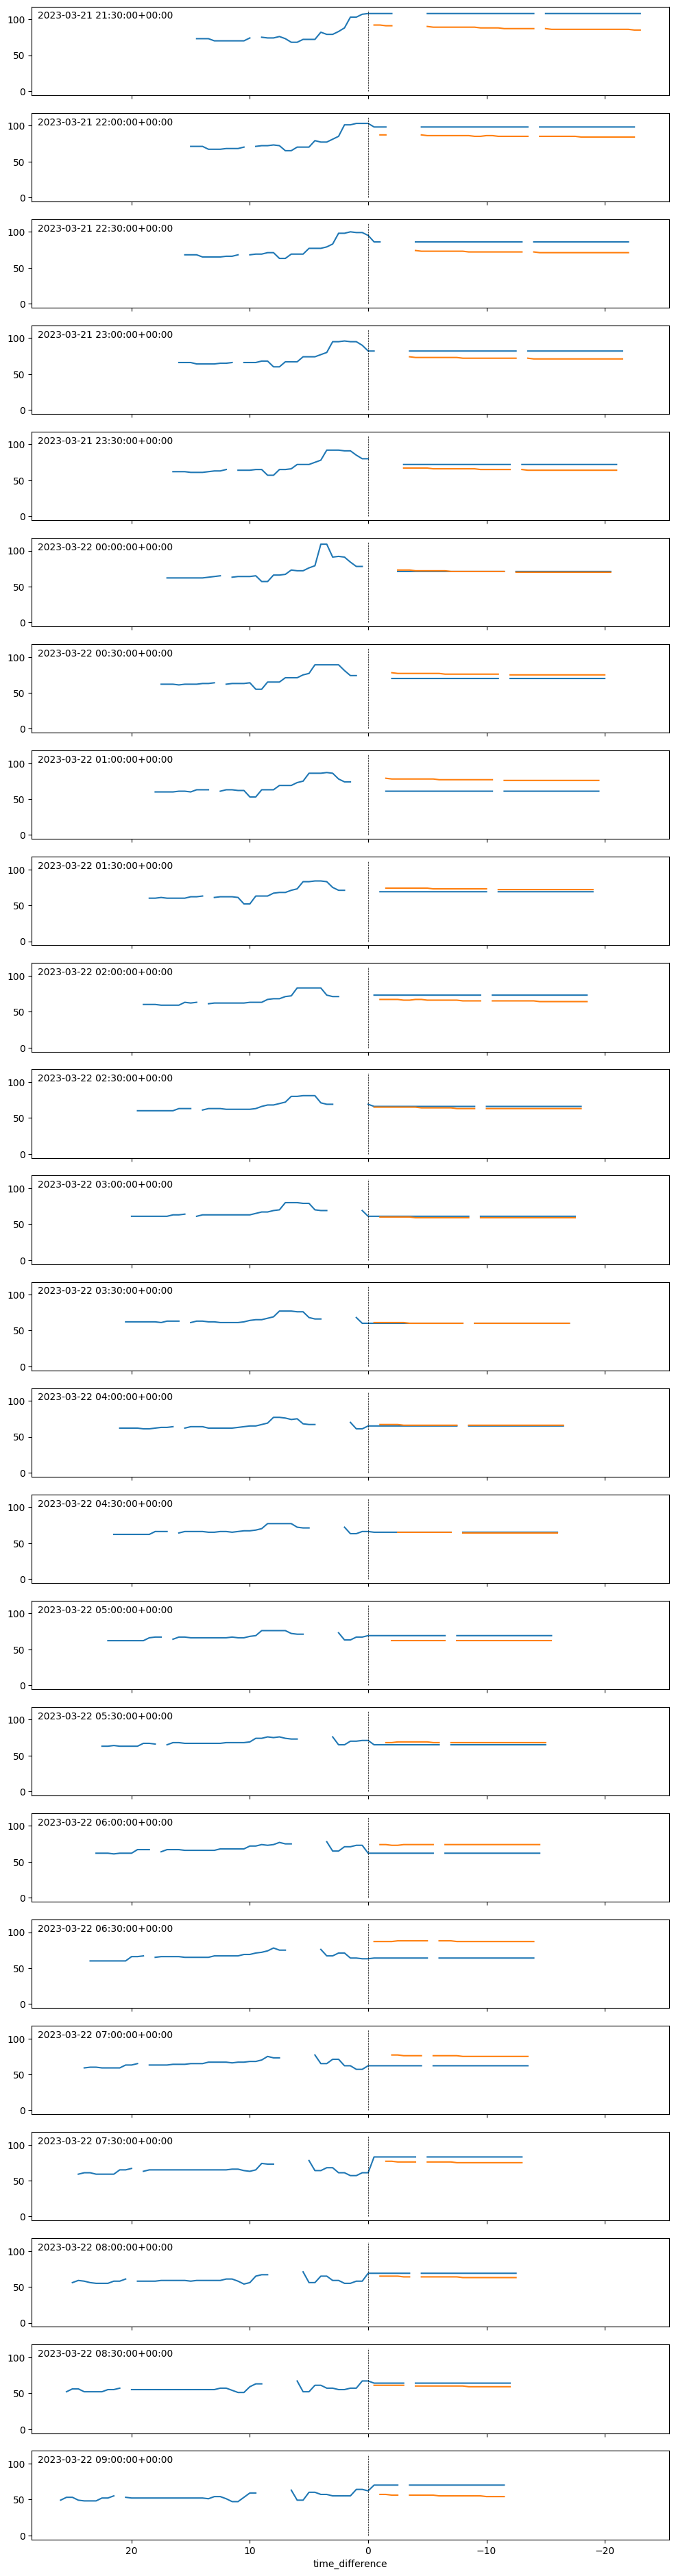

In [575]:
plt.rcParams['figure.figsize'] = [12, 48]
plt.rcParams['figure.dpi'] = 100

fig, axes = plt.subplots(nrows, 1, sharex=True, sharey="col")
for ix, ax in enumerate(axes):
    merged_df["intensity.forecast"].loc[dates[ix]].plot(ax=ax)
    merged_df["intensity.actual"].loc[dates[ix]].plot(ax=ax)
    ax.text(0.01, 0.95, dates[ix], horizontalalignment='left', verticalalignment='top', transform = ax.transAxes)
    
plt.gca().invert_xaxis()
ymax = plt.gca().get_ylim()[-1]

for ix, ax in enumerate(axes):
    ax.vlines(0.0,0,ymax, color='k', linestyle='--', linewidth=0.5)

plt.show()

Odd in the above that the post-hoc "forecast" value appears to be constant after about 30 minutes after the selected time-point, but the "actual" value continues to change.

The final forecast value doesn't appear until about 30 minutes after the start of the window; same with the "actual" value, which is only available after the end of the given window.

In [591]:
# Take a single value as the "actual"

merged_df["actual"] = merged_df["intensity.actual"].mean(axis=1)
merged_df["actual_median"] = merged_df["intensity.actual"].median(axis=1)

dfif = merged_df["intensity.forecast"]

df_forecasts_posthoc = dfif[[c for c in dfif.columns if float(c) < 0.0]]
merged_df["actual_forecast"] = df_forecasts_posthoc[-1.0]

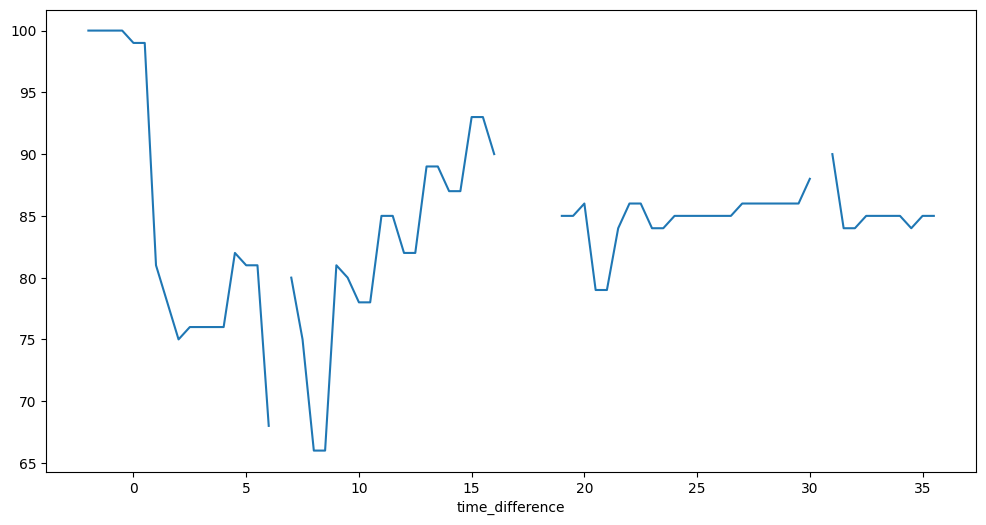

In [599]:
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100

plt.figure()
ax = dfif.iloc[-100].plot()

In [593]:
dfsub = merged_df["intensity.forecast"].sub(merged_df["actual"], axis=0)
dfsub_pc = dfsub / merged_df["intensity.forecast"]

dfsub_forecasts = merged_df["intensity.forecast"].sub(merged_df["actual_forecast"], axis=0)
dfsub_fc_pc = dfsub_forecasts / merged_df["intensity.forecast"]

The following Joy / Ridgeline plots are histograms taken across all available data.

For each of the 96 half-hourly timepoints prior to any given target window, we count into a histogram bin if the forecast has this much % error from the final forecast or mean "actual" value (which, confusingly, can change).

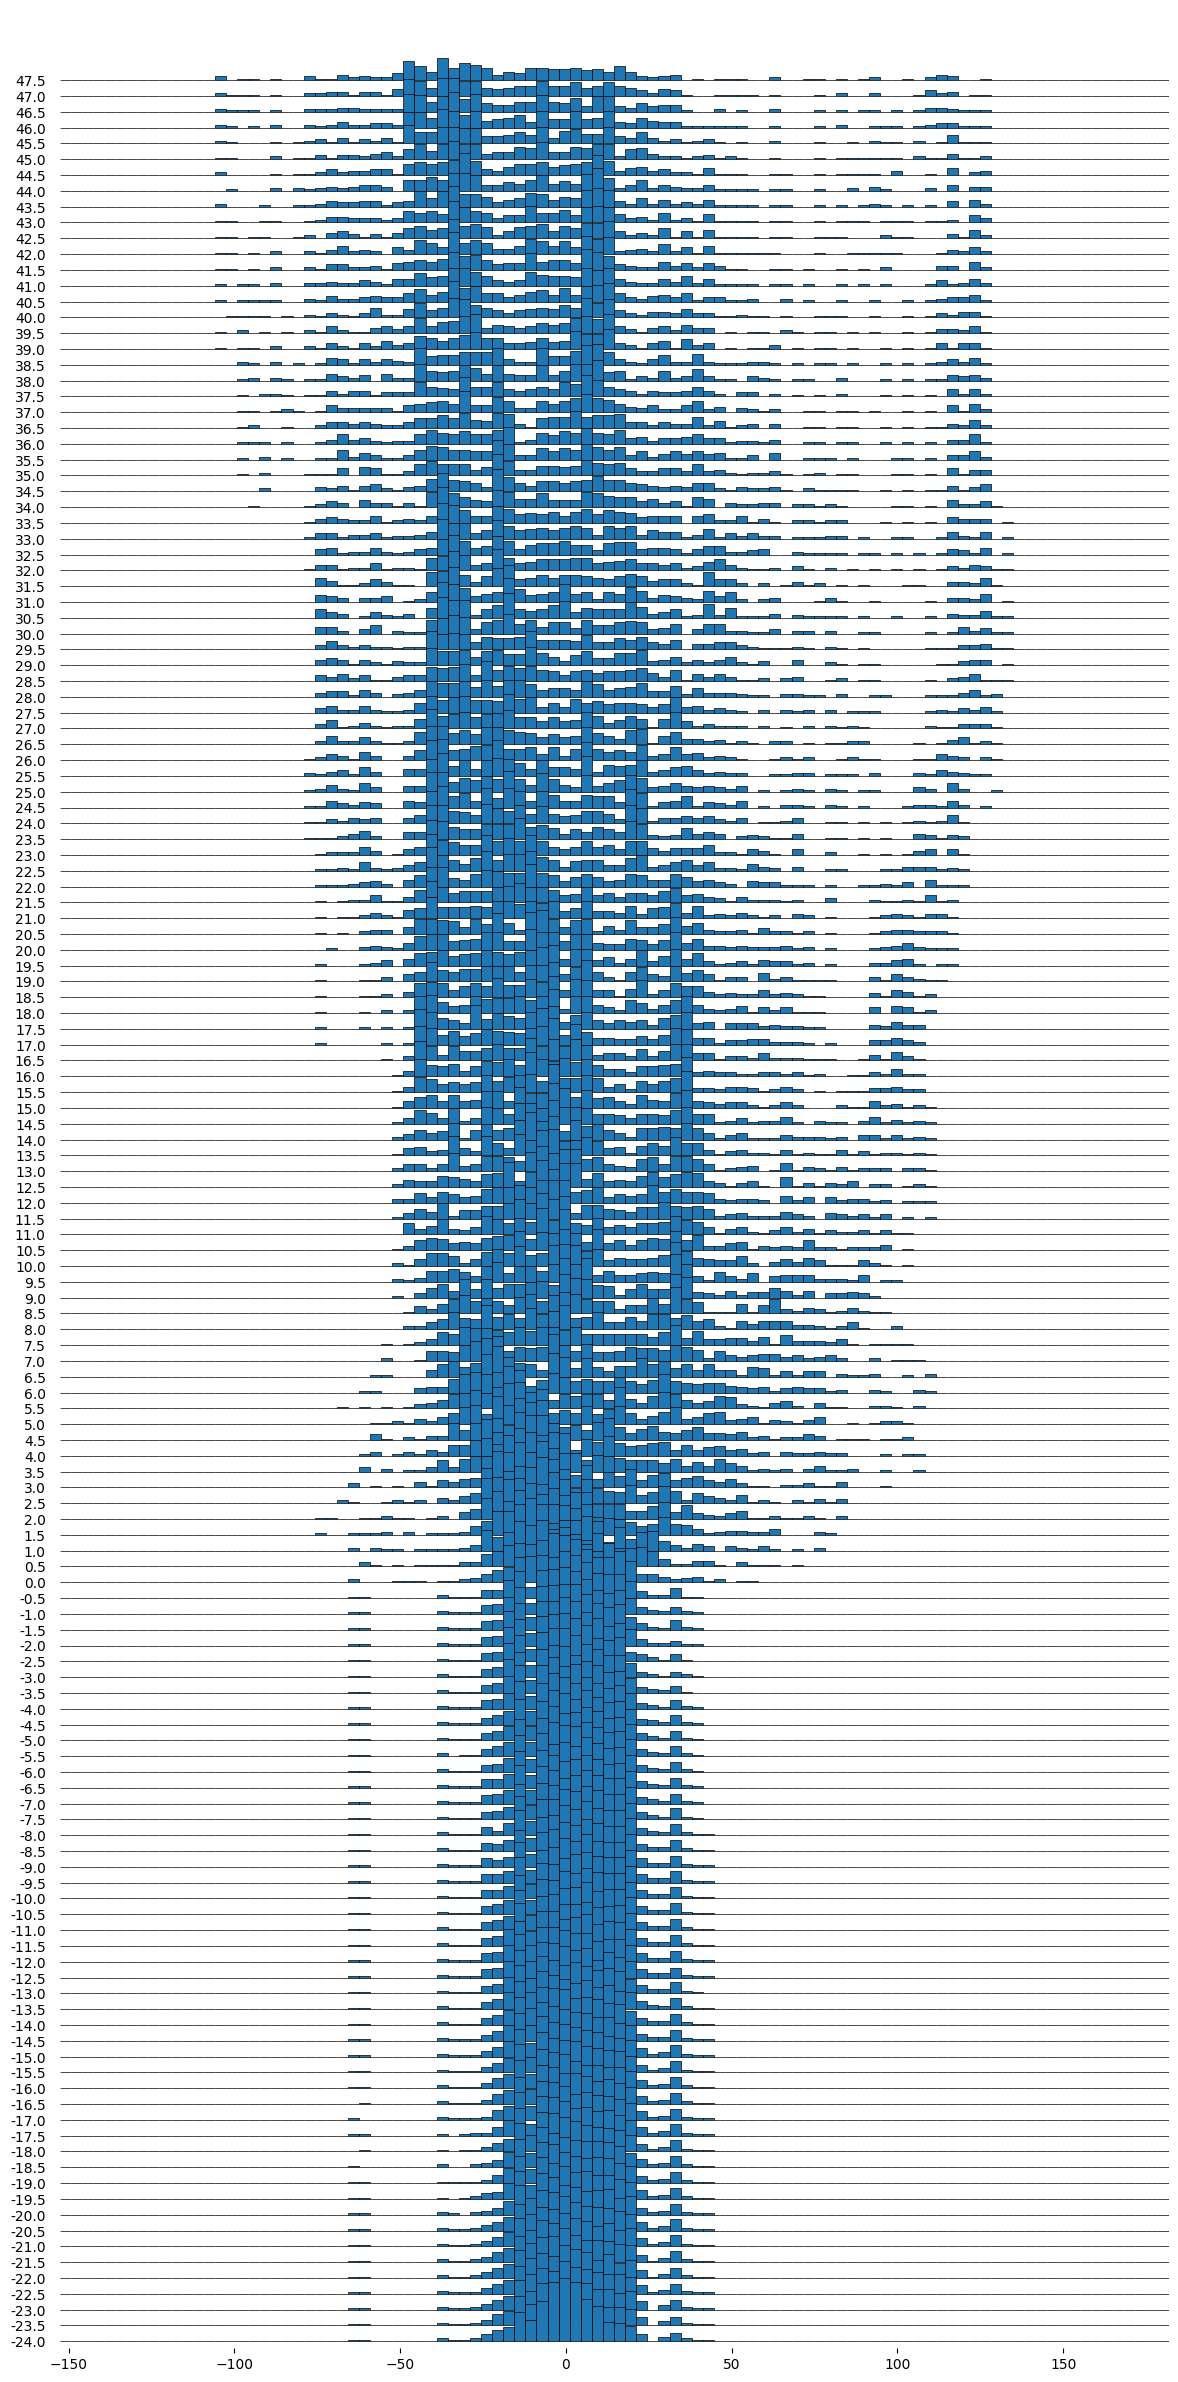

In [600]:
plt.rcParams['figure.figsize'] = [12, 24]
plt.rcParams['figure.dpi'] = 100

# Plot histographs of the actual data differences
# fig, ax = joypy.joyplot(dfsub, linewidth=0.5)
fig, ax = joypy.joyplot(dfsub, hist=True, bins=100, linewidth=0.5)

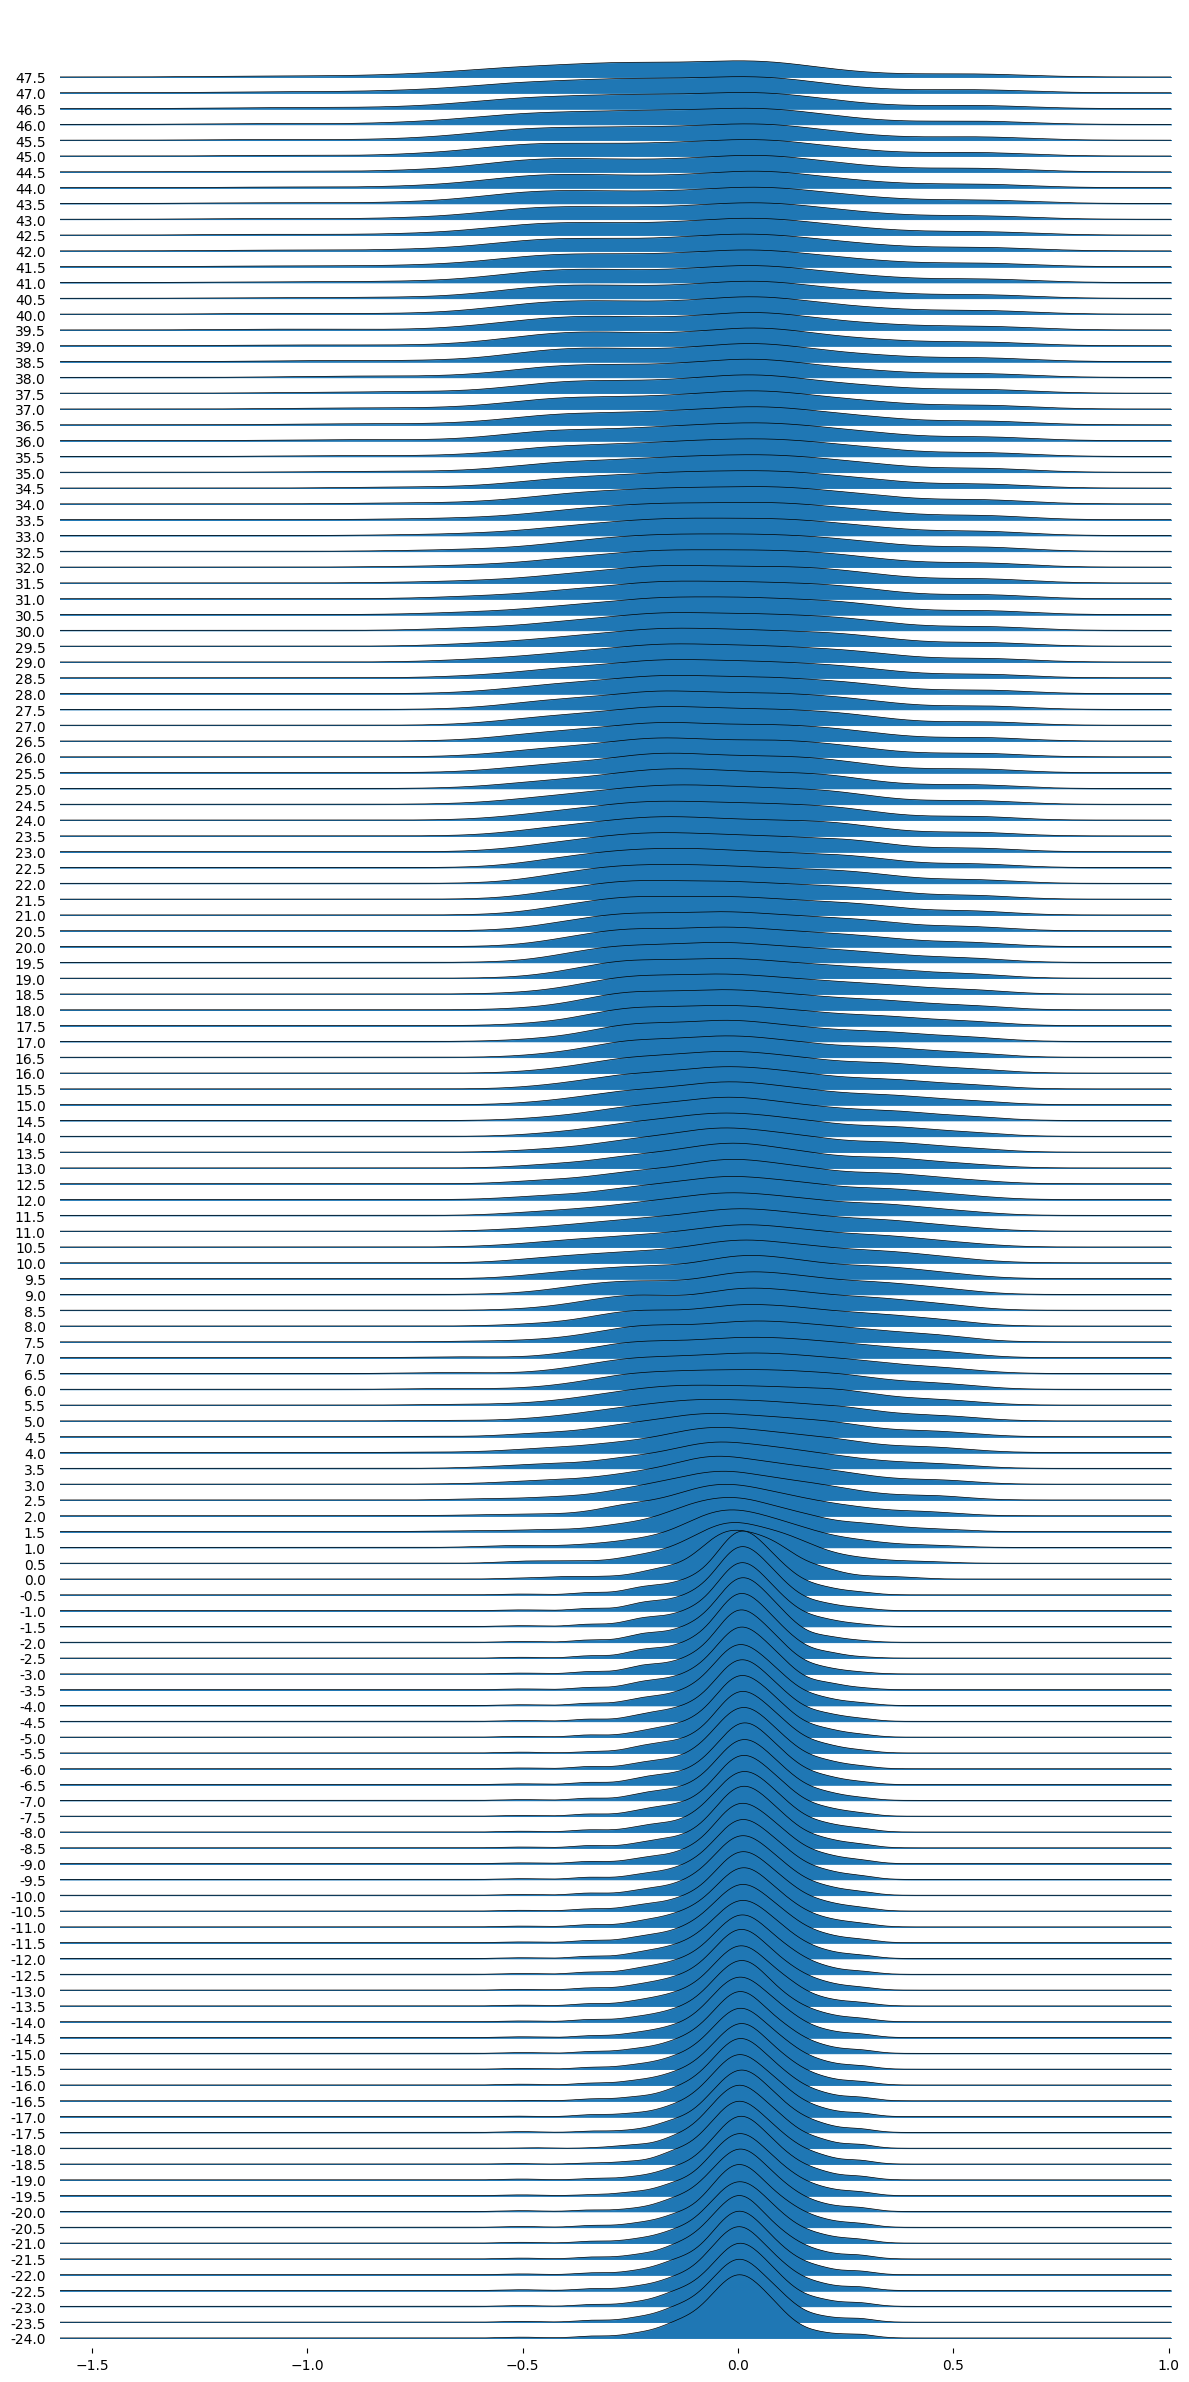

In [602]:
# Show a smoothed plot of the relative difference between the forecast and the mean "actual" value after.
fig, ax = joypy.joyplot(dfsub_pc, linewidth=0.5)

/Users/nick.powell/.virtualenvs/carbon-intensity-forecast-tracking/lib/python3.10/site-packages/joypy/joyplot.py:286: UserWarning: The data contains a group with a single distinct value (0.0) having infinite probability density. Consider using a different visualization.
  warnings.warn("The data contains a group with a single distinct value ({}) "


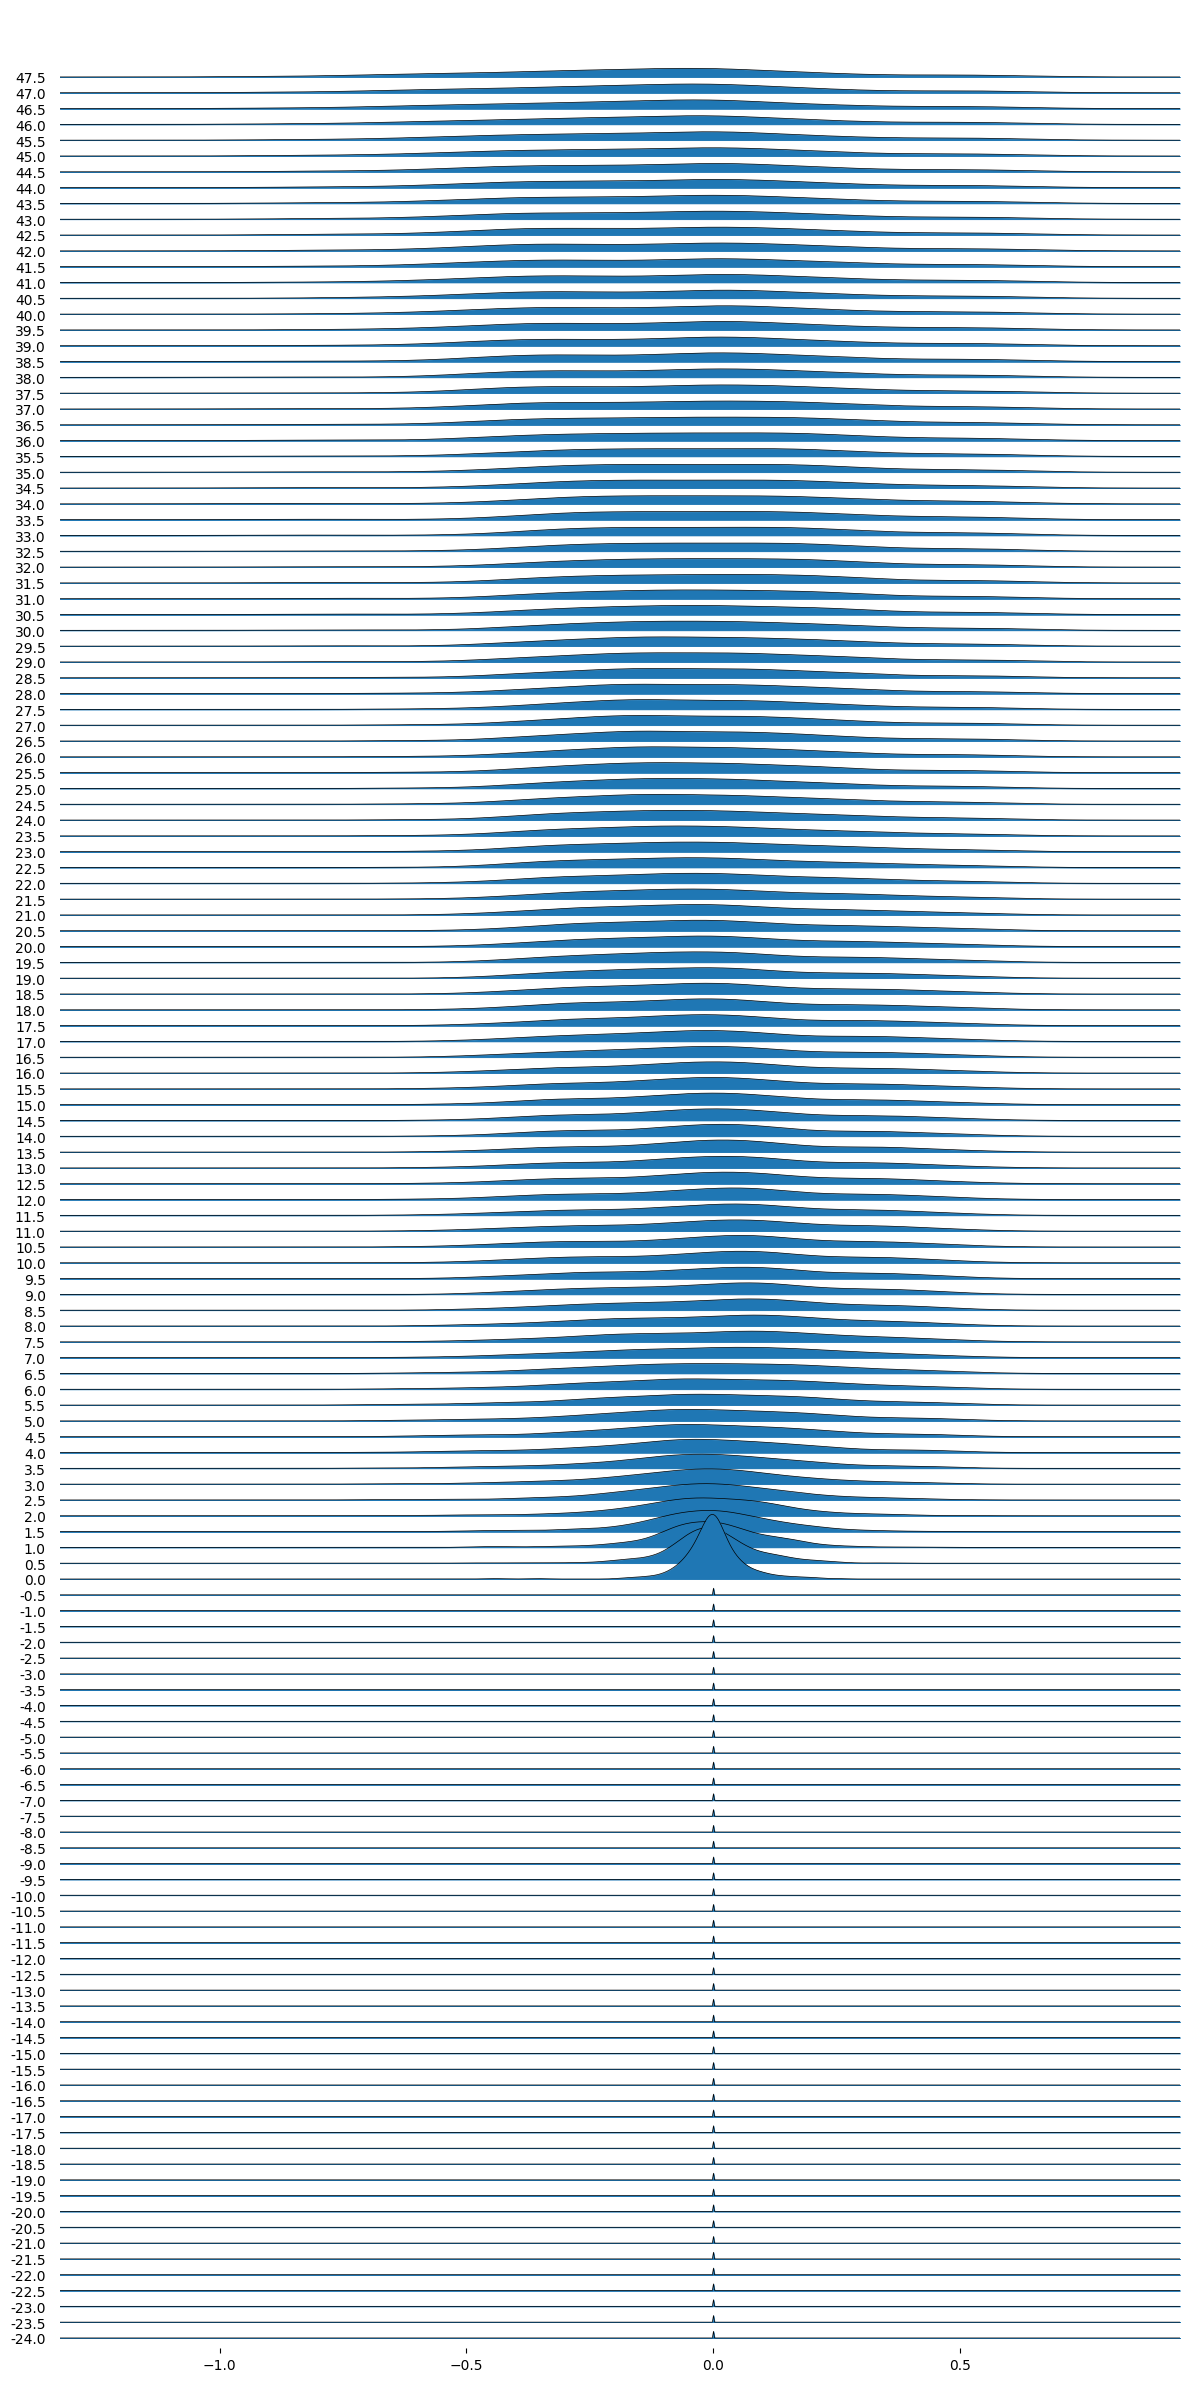

In [603]:
fig, ax = joypy.joyplot(dfsub_fc_pc, linewidth=0.5)